In [1]:
import pandas as pd
import numpy as np
from functions.dataframe_functions import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_first = "../matlab_report-master/Treadmill/Test/Torsby/"
skier_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
path_second = "/CSV/csvData.csv"
filepath_list = [path_first + str(i) + path_second for i in skier_list]

main_df, df_peaks, df_info = get_dataframe(filepath_list, skier_list)

In [52]:
main_df

,Time (min),Force left (N),Force right (N),Time (floor min),Slope (%),Speed (km/h),Gear,Skier,Time (sec)
0,0.000167,10.4240,8.28730,0.0,2,14,3,1,0.000000
1,0.000333,9.9703,8.50110,0.0,2,14,3,1,0.009994
2,0.000500,10.0600,8.77590,0.0,2,14,3,1,0.019987
3,0.000666,10.0300,9.11160,0.0,2,14,3,1,0.029981
4,0.000833,9.9989,9.41660,0.0,2,14,3,1,0.039975
...,...,...,...,...,...,...,...,...,...
991564,16.666000,59.7160,0.52152,0.0,0,0,0,10,999.979948
991565,16.666000,52.1270,0.65340,0.0,0,0,0,10,999.989961
991566,16.666000,37.1190,0.85348,0.0,0,0,0,10,999.999974
991567,16.666000,39.4300,1.03590,0.0,0,0,0,10,1000.009987


## ------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis

In [29]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# df_peaks

In [6]:
df_peaks

,Gear,Peak time,Peak height,Stroke and ground contact start,Height start,Ground contact stop,Height stop,Stroke stop,Skier,Force area,Pole
0,3,3.098048,56.961,2.828218,0,3.337897,0,3.997481,1,18.356453,0
1,3,4.097419,56.245,3.997481,0,4.307286,0,5.026833,1,11.082013,0
2,3,5.056814,67.408,5.026833,0,5.266682,0,5.916273,1,8.734623,0
3,3,5.956247,83.786,5.916273,0,6.196096,0,6.865674,1,13.331998,0
4,3,7.035567,95.712,6.865674,0,7.235441,0,7.855051,1,25.082068,0
...,...,...,...,...,...,...,...,...,...,...,...
17206,0,988.895427,46.251,988.795296,0,989.175794,0,990.277237,10,12.349700,1
17207,0,990.377368,40.335,990.277237,0,990.677762,0,991.939415,10,10.205823,1
17208,0,992.069585,82.269,991.939415,0,992.339939,0,993.531500,10,23.290517,1
17209,0,993.731763,69.037,993.531500,0,993.932025,0,995.193678,10,18.639898,1


In [25]:
data = df_peaks

X_train = df_peaks[df_peaks.columns.difference(['Gear'])]
X_valid = df_peaks['Gear']
#y_train = data[lst[2]]
#y_valid = data[lst[3]]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_valid = sc.transform(X_valid)

In [44]:
#Converting the Training set into a Pandas Dataframe for easier analysis of some aspects
df = df_peaks[df_peaks.columns.difference(['Gear','Height start', 'Height stop'])]
dv = pd.DataFrame(df_peaks['Gear'])

#Using the describe feature to view the composition of each of the variables
print(df.describe())

         Force area  Ground contact stop   Peak height     Peak time  \
count  17211.000000         17211.000000  17211.000000  17211.000000   
mean      29.354528           473.532624    150.548382    473.283312   
std       12.996641           285.170054     62.762097    285.139564   
min        1.506087             2.523305     16.890000      2.252951   
25%       19.337199           226.609153     99.893500    226.368986   
50%       27.870088           459.381778    144.060000    459.111424   
75%       37.138654           712.505066    194.840000    712.247281   
max       89.888448           997.688415    379.010000    997.468265   

               Pole         Skier  Stroke and ground contact start  \
count  17211.000000  17211.000000                     17211.000000   
mean       0.499971      5.515019                       473.157852   
std        0.500015      2.848763                       285.126312   
min        0.000000      1.000000                         2.072715   
2

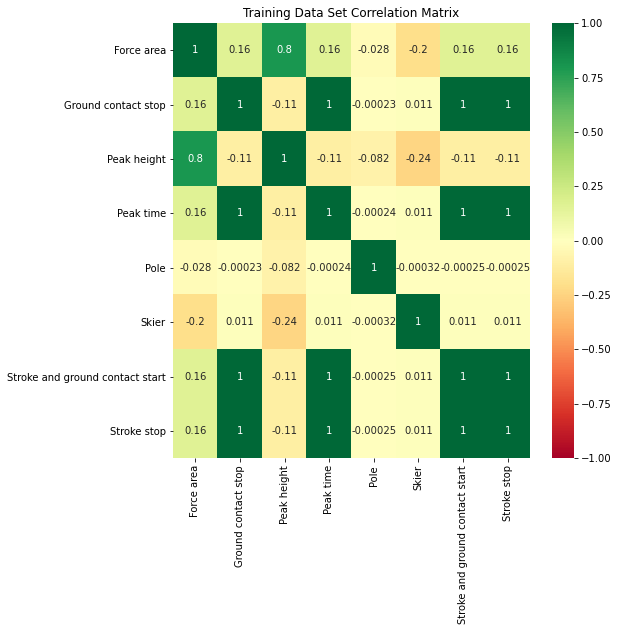

In [37]:
# Creating a correlation matric to visualize the correlation between variables
# This will help us perform some feature selection based on filtering by correlation scores.

corr = df.corr()

plt.figure(figsize = (8,8))

# Visualizing the correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220),
    cmap="RdYlGn",
    #square=True,
    #linewidths=.5
    annot=True
)
plt.title('Training Data Set Correlation Matrix')

#plt.gcf()
#plt.savefig('Training Data Set Correlation Matrix', bbox_to_anchor='tight')

plt.show()

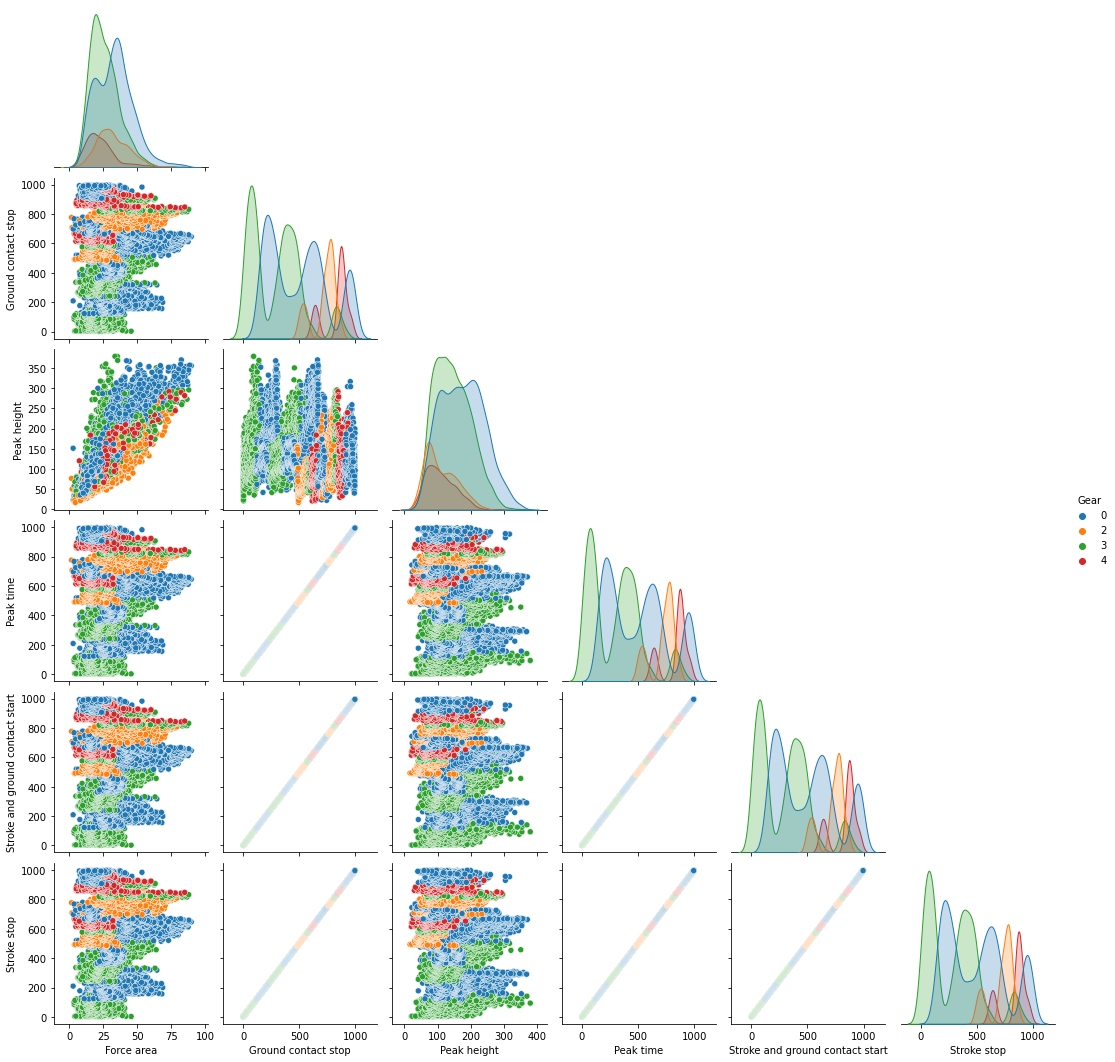

In [42]:
sns.pairplot(df_peaks[df_peaks.columns.difference(['Height start', 'Height stop', 'Pole', 'Skier'])],
             hue="Gear", corner=True, palette="tab10")

# df_info

In [7]:
df_info

,Gear,Stroke time,Ground contact time,Air time,Frequency,Force area,Skier,Peak time,Pole,Time to other pole,Other pole index
0,3,1.169263,0.509679,0.659584,0.855239,18.356453,1,3.098048,0,0.109931,0
1,3,1.029351,0.309805,0.719547,0.971485,11.082013,1,4.097419,0,0.129918,1
2,3,0.889440,0.239849,0.649591,1.124303,8.734623,1,5.056814,0,0.339786,2
3,3,0.949402,0.279824,0.669578,1.053295,13.331998,1,5.956247,0,0.119924,3
4,3,0.989377,0.369767,0.619610,1.010737,25.082068,1,7.035567,0,0.119924,4
...,...,...,...,...,...,...,...,...,...,...,...
17206,0,1.481941,0.380498,1.101443,0.674791,12.349700,10,988.895427,1,0.450590,848
17207,0,1.662177,0.400525,1.261653,0.601620,10.205823,10,990.377368,1,0.440577,849
17208,0,1.592086,0.400525,1.191561,0.628107,23.290517,10,992.069585,1,0.450590,850
17209,0,1.662177,0.400525,1.261653,0.601620,18.639898,10,993.731763,1,0.470616,851


In [45]:
data = df_info

X_train = df_info[df_info.columns.difference(['Gear'])]
X_valid = df_info['Gear']
#y_train = data[lst[2]]
#y_valid = data[lst[3]]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_valid = sc.transform(X_valid)

In [46]:
#Converting the Training set into a Pandas Dataframe for easier analysis of some aspects
df = df_info[df_info.columns.difference(['Gear'])]
dv = pd.DataFrame(df_info['Gear'])

#Using the describe feature to view the composition of each of the variables
print(df.describe())

           Air time    Force area     Frequency  Ground contact time  \
count  17211.000000  17211.000000  17211.000000         17211.000000   
mean       0.781177     29.354528      0.888619             0.374772   
std        0.170910     12.996641      0.137953             0.104024   
min        0.146104      1.506087      0.211998             0.029983   
25%        0.680041     19.337199      0.787354             0.309805   
50%        0.739571     27.870088      0.903991             0.354821   
75%        0.814000     37.138654      0.987867             0.419736   
max        4.047450     89.888448      1.570854             1.304501   

       Other pole index     Peak time          Pole         Skier  \
count      17211.000000  17211.000000  17211.000000  17211.000000   
mean         430.355296    473.283312      0.499971      5.515019   
std          249.408332    285.139564      0.500015      2.848763   
min            0.000000      2.252951      0.000000      1.000000   
25%   

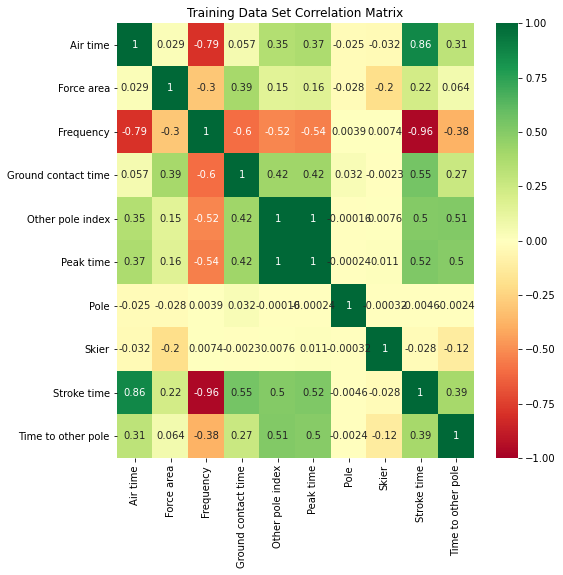

In [47]:
# Creating a correlation matric to visualize the correlation between variables
# This will help us perform some feature selection based on filtering by correlation scores.

corr = df.corr()

plt.figure(figsize = (8,8))

# Visualizing the correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220),
    cmap="RdYlGn",
    #square=True,
    #linewidths=.5
    annot=True
)
plt.title('Training Data Set Correlation Matrix')

#plt.gcf()
#plt.savefig('Training Data Set Correlation Matrix', bbox_to_anchor='tight')

plt.show()

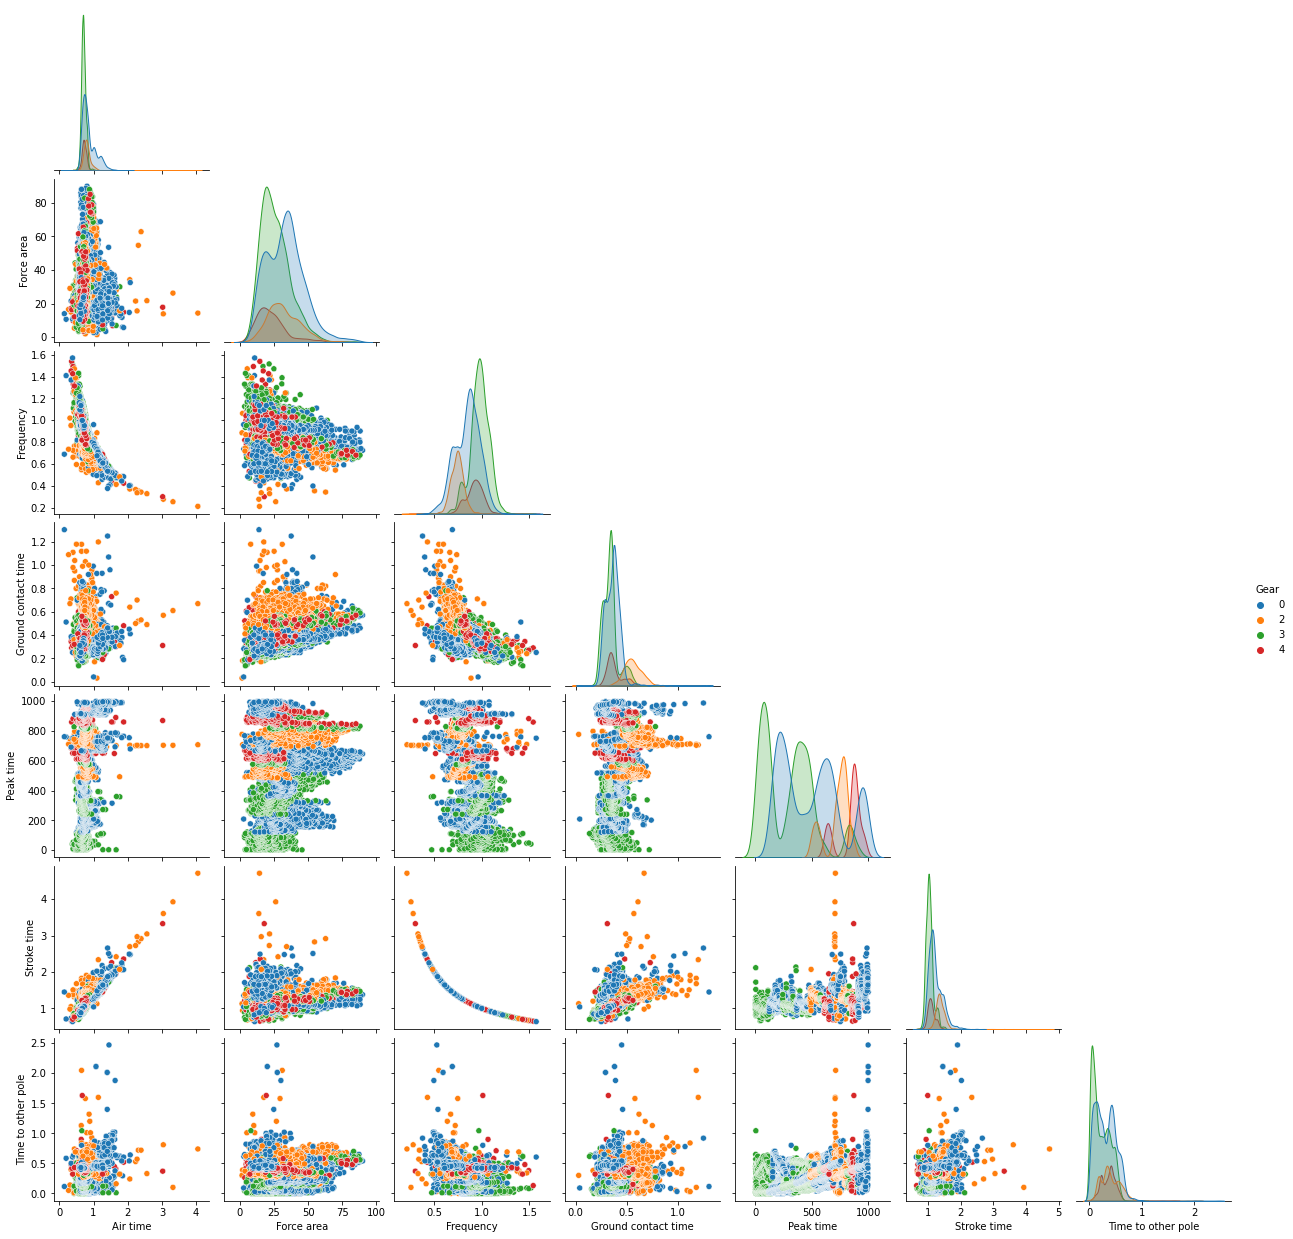

In [48]:
sns.pairplot(df_info[df_info.columns.difference(['Other pole index', 'Pole', 'Skier'])],
             hue="Gear", corner=True, palette="tab10")

# main_df

In [53]:
main_df

,Time (min),Force left (N),Force right (N),Time (floor min),Slope (%),Speed (km/h),Gear,Skier,Time (sec)
0,0.000167,10.4240,8.28730,0.0,2,14,3,1,0.000000
1,0.000333,9.9703,8.50110,0.0,2,14,3,1,0.009994
2,0.000500,10.0600,8.77590,0.0,2,14,3,1,0.019987
3,0.000666,10.0300,9.11160,0.0,2,14,3,1,0.029981
4,0.000833,9.9989,9.41660,0.0,2,14,3,1,0.039975
...,...,...,...,...,...,...,...,...,...
991564,16.666000,59.7160,0.52152,0.0,0,0,0,10,999.979948
991565,16.666000,52.1270,0.65340,0.0,0,0,0,10,999.989961
991566,16.666000,37.1190,0.85348,0.0,0,0,0,10,999.999974
991567,16.666000,39.4300,1.03590,0.0,0,0,0,10,1000.009987


In [57]:
data = main_df

X_train = main_df[main_df.columns.difference(['Gear'])]
X_valid = main_df['Gear']
#y_train = data[lst[2]]
#y_valid = data[lst[3]]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_valid = sc.transform(X_valid)

In [58]:
#Converting the Training set into a Pandas Dataframe for easier analysis of some aspects
df = main_df[main_df.columns.difference(['Gear'])]
dv = pd.DataFrame(main_df['Gear'])

#Using the describe feature to view the composition of each of the variables
print(df.describe())

       Force left (N)  Force right (N)          Skier      Slope (%)  \
count   991569.000000    991569.000000  991569.000000  991569.000000   
mean        26.149377        25.688968       5.490167       3.367131   
std         49.842647        49.336196       2.882238       2.881545   
min        -20.241000       -26.487000       1.000000       0.000000   
25%         -0.023276        -0.028313       3.000000       2.000000   
50%          0.093727         0.208240       5.000000       2.000000   
75%         29.791000        29.134000       8.000000       4.000000   
max        368.070000       379.010000      10.000000      12.000000   

        Speed (km/h)  Time (floor min)     Time (min)     Time (sec)  
count  991569.000000     991569.000000  991569.000000  991569.000000  
mean       13.557481          6.470534       8.219441     500.003947  
std         6.141741          4.872775       4.744893     288.680471  
min         0.000000          0.000000       0.000160       0.00000

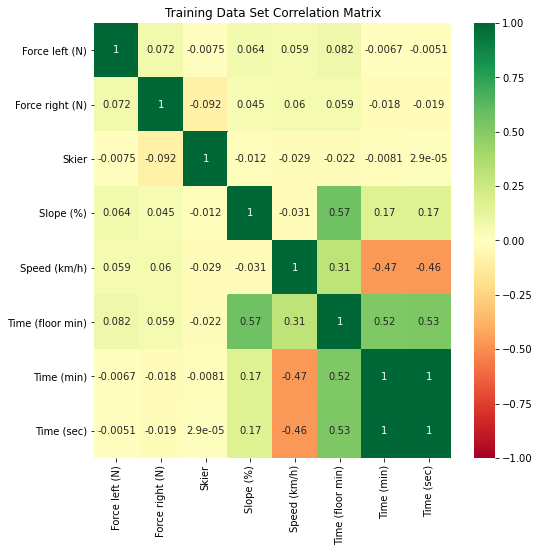

In [59]:
# Creating a correlation matric to visualize the correlation between variables
# This will help us perform some feature selection based on filtering by correlation scores.

corr = df.corr()

plt.figure(figsize = (8,8))

# Visualizing the correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220),
    cmap="RdYlGn",
    #square=True,
    #linewidths=.5
    annot=True
)
plt.title('Training Data Set Correlation Matrix')

#plt.gcf()
#plt.savefig('Training Data Set Correlation Matrix', bbox_to_anchor='tight')

plt.show()

In [ ]:
#sns.pairplot(main_df[main_df.columns.difference(['Skier','Time (floor min)'])],hue="Gear", corner=True, palette="tab10")

---
---
---
# BASIC MODEL EVALUATION
---

In [4]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn import metrics

In [91]:
X = df_info[df_info.columns.difference(['Skier','Pole', 'Other pole index', 'Gear','Peak time'])]
y = (df_info['Gear'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13768, 6) (3443, 6) (13768,) (3443,)


In [92]:
Counter(y_test)

Counter({2: 387, 3: 1326, 0: 1443, 4: 287})

In [93]:
# Specifiying the range of Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 20, num = 4)]
#n_estimators = [10]

# Specifying the range of Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_depth.append(None)

# Specifying the range of Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
#min_samples_split = [4]

# Specifying the range of Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#min_samples_leaf = [2]

# Specifying the Method of selecting samples for training each tree
bootstrap = [True, False]
#bootstrap = [True]

# Specifying the Class weight
#class_weight = ['balanced', 'balanced_subsample']

# Now, we create the random grid that would store all the values as specified above
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap#,
              #'class_weight' : class_weight
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [4, 9, 14, 20]}


In [94]:
# Now, using the random grid created above, we start to search for the best hyperparameters

# First we create the base model that we want to tune by specifying no parameters
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='accuracy', 
                              cv = 5, verbose=2,
                               # random_state=42,
                               n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   45.6s finished


In [95]:
rf_random.best_params_

{'n_estimators': 14,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 70,
 'bootstrap': False}

In [96]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_split=6,
                       n_estimators=14)

In [97]:
# Build the Random Forest Classifier model
#rfc = RandomForestClassifier()

#best_grid = grid_search.best_estimator_

rfc = rf_random.best_estimator_

# Fit the model
rfc.fit(X_train, y_train)

sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=False, max_depth=70,
                                                 min_samples_split=6,
                                                 n_estimators=14))

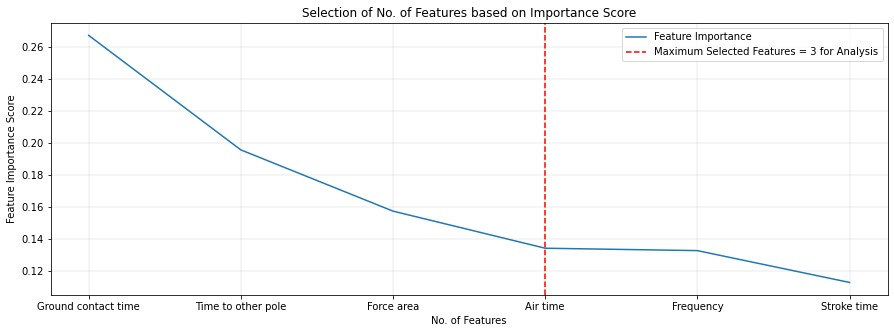

Accuracy Score: 0.7879756026720883
F-1 Score: 0.7838799273750426
MCC Score: 0.8876207938449333
Mean Absolute Error: 0.5068254429276794
Mean Squared Error: 1.4461225675283182
Root Mean Squared Error: 1.2025483639040544
Classifier Score: 0.8533255881498693

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1443
           2       0.75      0.76      0.76       387
           3       0.77      0.83      0.80      1326
           4       0.60      0.41      0.49       287

    accuracy                           0.79      3443
   macro avg       0.74      0.71      0.72      3443
weighted avg       0.78      0.79      0.78      3443



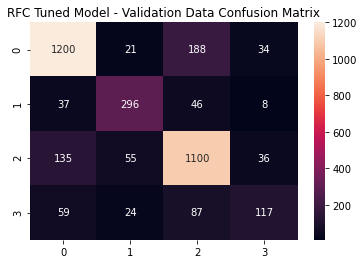

In [107]:
X_valid = X_test
y_valid = y_test

# Save the Feature Importances sorted by their score
imp_score = np.array(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), pd.DataFrame(X_train).columns.values), reverse=True))

#imp_features = 15
imp_features = int((np.count_nonzero(sel.get_support())))
imp_features = 3

fig = plt.figure(figsize=(15, 5))

plt.plot(list(imp_score[:,1]),list(imp_score[:,0].astype(float)), label='Feature Importance')
#plt.xticks(,list(imp_score[:,1]))
plt.axvline(imp_features, color='r', linestyle='--', label='Maximum Selected Features = {} for Analysis'.format(imp_features))
plt.xlabel("No. of Features")
plt.ylabel("Feature Importance Score")
plt.title("Selection of No. of Features based on Importance Score")
plt.legend(loc='best')
plt.grid(True,linewidth=0.25)
#plt.xticks(range(0,X_train.shape[1],20))
#plt.gcf()
#plt.savefig('RFC Feature Selection Plot', bbox_to_anchor='tight')
plt.show()
#plt.close()

# Predict Values using all the features, without reduction
all_y_pred = rfc.predict(X_valid)

# Build the k-fold cross-validator
kfold = KFold(n_splits=5)
all_y_pred = cross_val_predict(rfc, X_valid, y_valid, cv=kfold)


results = np.ndarray(shape=(1,11))

CM_arr = metrics.confusion_matrix(y_valid, all_y_pred)

TP = CM_arr[0][0]                                                                                          # True Positives
FN = CM_arr[0][1]                                                                                          # False Positives
FP = CM_arr[1][0]                                                                                          # True Negatives
TN = CM_arr[1][1]                                                                                          # False Negatives

results[0][0] = metrics.accuracy_score(y_valid, all_y_pred) #Accuracy
results[0][1] = TP/(TP+FN)   #Sensitivity/Recall/True positive rate (TPR)
results[0][2] = TN/(FP+TN)                                                                         # True negative rate
results[0][3] = FP/(FP+TN)                                                                         # False positive rate
results[0][4] = TP/(TP+FP)
results[0][5] = metrics.f1_score(y_valid, all_y_pred, average='weighted')
results[0][6] = ((TP*TN)-(FP*FN))/(np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN)))
results[0][7] = metrics.mean_absolute_error(y_valid, all_y_pred)
results[0][8] = metrics.mean_squared_error(y_valid, all_y_pred)
results[0][9] = np.sqrt(metrics.mean_squared_error(y_valid, all_y_pred))
results[0][10] = rfc.score(X_valid,y_valid)

print('Accuracy Score:', results[0][0])
print('F-1 Score:', results[0][5])
print('MCC Score:', results[0][6])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, all_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, all_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, all_y_pred)))
print('Classifier Score:', rfc.score(X_valid,y_valid))

print('\nClassification Report: \n', metrics.classification_report(y_valid, all_y_pred))

file_prefix = 'RFC Tuned Model - Validation Data '

plt.figure()
sns.heatmap(CM_arr, annot=True,fmt='0.0f')
plt.title('{}Confusion Matrix'.format(file_prefix))
#plt.gcf()
#plt.savefig('{}_Confusion Matrix'.format(file_prefix), bbox_to_anchor='tight')
plt.show()
#plt.close()


In [108]:
imp_score

array([['0.2673', 'Ground contact time'],
       ['0.1957', 'Time to other pole'],
       ['0.1574', 'Force area'],
       ['0.1342', 'Air time'],
       ['0.1327', 'Frequency'],
       ['0.1128', 'Stroke time']], dtype='<U32')

In [109]:
Counter(all_y_pred)

Counter({2: 396, 3: 1421, 0: 1431, 4: 195})

In [110]:
Counter(y_valid)

Counter({2: 387, 3: 1326, 0: 1443, 4: 287})

In [111]:
X_valid

,Air time,Force area,Frequency,Ground contact time,Stroke time,Time to other pole
11112,0.761829,52.937381,0.748610,0.573980,1.335809,0.187848
7860,0.689607,26.322375,1.042260,0.269846,0.959453,0.319818
1627,0.810000,16.739675,0.819672,0.410000,1.220000,0.130000
6479,0.740044,23.941652,0.787354,0.530032,1.270076,0.550033
15494,1.140776,13.379229,0.661801,0.370252,1.511027,0.460313
...,...,...,...,...,...,...
6823,0.680041,14.595356,0.961481,0.360022,1.040062,0.500030
6353,0.630038,14.054840,1.149356,0.240014,0.870052,0.430026
5213,0.520031,24.083088,1.149356,0.350021,0.870052,0.170010
4778,0.749565,43.052676,0.862569,0.409762,1.159328,0.379780
